In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Mine
from wilson_cowan_2d.systems.concrete_solvers import UVRK4, WZRK4
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential, Dist1DGrid
from wilson_cowan_2d.kernels.kernels import make_K_2_populations

%load_ext autoreload
%autoreload 2

In [3]:
param = wck.DefaultParams(τ = 0.001, η = 3.2, size = 2**9)
# param.A = np.array([[500, 1.5],[0.25, 1.5]])
param.F = lambda x: 1/(1 + np.exp(-50000 * x))
σe = 3
σi = 0.8 * σe

u_str = 1
v_str = 1
e_kern = decreasing_exponential(Dist1DGrid(param.size).grid, σe)
e_kern = e_kern/e_kern.sum(axis=1)
i_kern = decreasing_exponential(Dist1DGrid(param.size).grid, σi)
i_kern = i_kern/i_kern.sum(axis=1)

u = 0.01*np.zeros(param.size).reshape((param.size,1))#*np.power(np.sin(np.arange(0, 512,1)/2**1),2 )
u[0:2**1] = u_str
v = 0.01*np.zeros(param.size).reshape((param.size, 1))
# v[0:2**1] = v_str
w = (e_kern @ u).reshape((param.size, 1))
q = (i_kern @ v).reshape((param.size, 1))
z = np.zeros_like(w) #np.gradient(w[:,0]).reshape((param.size, 1))
p = np.zeros_like(q) #np.gradient(q[:,0]).reshape((param.size, 1))
inp = (u, v, w, z, q, p)

In [4]:
class_test = wck.WCDecExpLocal1D(inp[0:4], param, np.array([σe, σi]))

res = class_test((0, 10))

/tmp/ipykernel_450062/2009196075.py:3: RuntimeWarning: overflow encountered in exp
  param.F = lambda x: 1/(1 + np.exp(-50000 * x))


4 2477


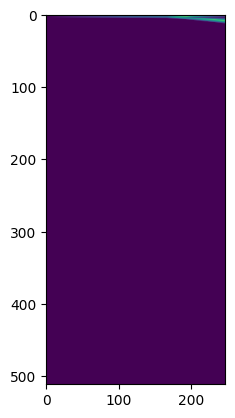

In [8]:
plt.imshow(res.u[:,::10])